# NN example

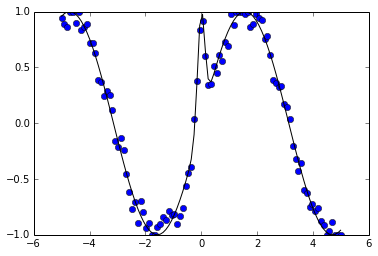

In [1]:
import numpy as np
import math
from scipy.stats import logistic
from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib inline

x1 = np.linspace(-5,5,100)
#x2 = np.linspace(-6,6,100)
#X = np.array([x1,x2])
noise = np.random.uniform(-0.15,0.15,100)
#y_true = np.sin(x1*0.005) + np.sin(x2+0.005) 
y_true = np.sin(x1) + np.exp(-30*x1**2)
y = y_true + noise
y = np.clip(y,-1,1)
plt.plot(x1,y,'bo',x1,y_true,'k')
plt.show()

Linear layer equations

Forward pass:
$$ \underset{1\times c}{Y_n} = \underset{1\times b}{Y_{n-1}}\underset{b\times c}{W_n} + \underset{1\times c}{B_n} $$

Backward pass:
$$  \frac{\partial E}{\partial W_n} = Y_n^T.\frac{\partial E}{\partial Y_n}$$

Backward message:
$$  \frac{\partial E}{\partial Y_n} = \frac{\partial E}{\partial Y_n}.W_n^T$$

In [2]:
class FullyConnectedLayer:
    def __init__(self,nIn,nOut):
        self.W = np.random.uniform(-0.1,0.1,(nIn,nOut))
        self.B = np.zeros((1,nOut))
    def forward(self,input):
        self.input = input
        return np.dot(input,self.W) + self.B
    def backward(self,dOutput,lr):
        self.dW = np.dot(self.input.T,dOutput)
        self.dB = dOutput.sum(0,keepdims=True)
        self.W -= self.dW*lr
        self.B -= self.dB*lr
        return np.dot(dOutput,self.W.T)
    
class Tanh:
    def forward(self,input):
        self.input = input
        return np.tanh(input)
    def backward(self,dOutput,lr):
        return dOutput*(1 - np.tanh(self.input)**2)

class MSE:
    def forward(self,input,target):
        return 0.5*np.power(input-target,2)
    def backward(self,input,target):
        return input-target

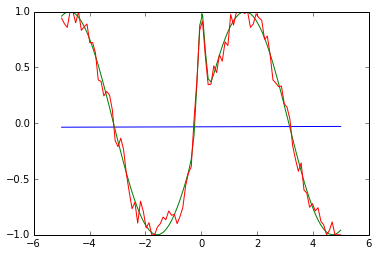

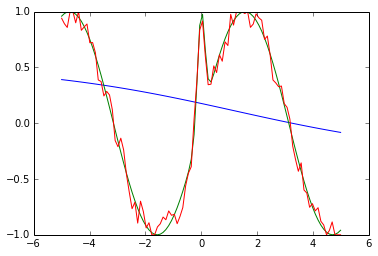

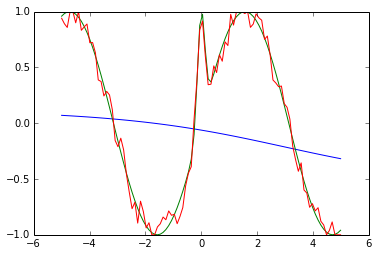

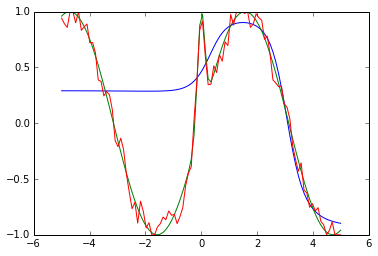

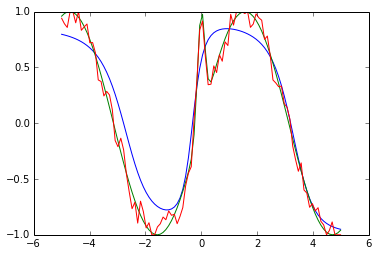

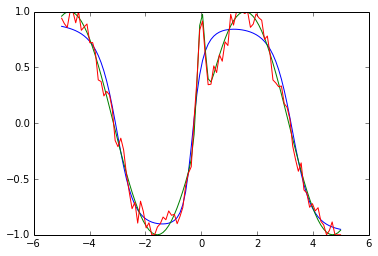

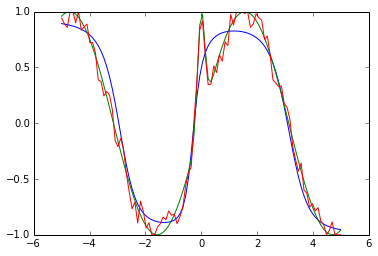

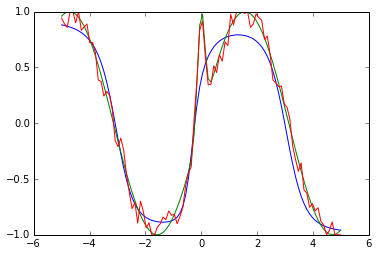

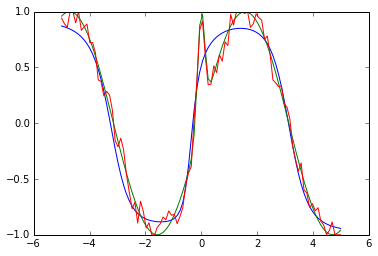

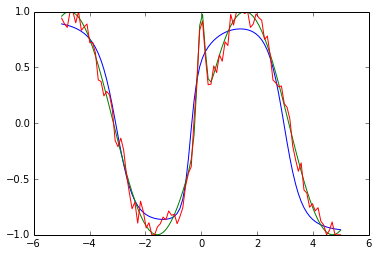

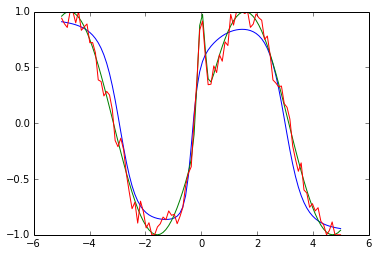

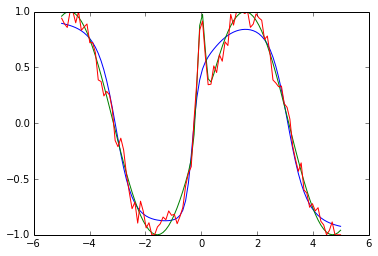

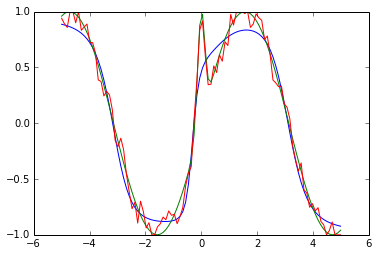

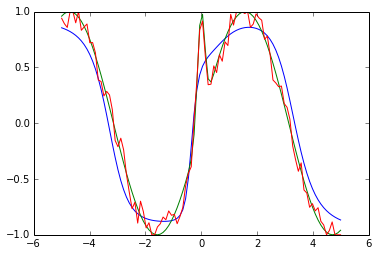

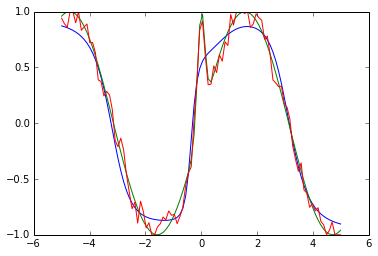

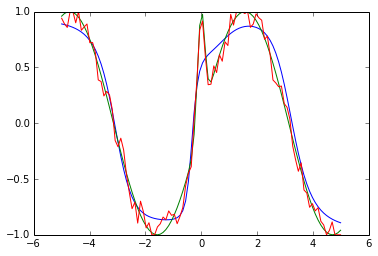

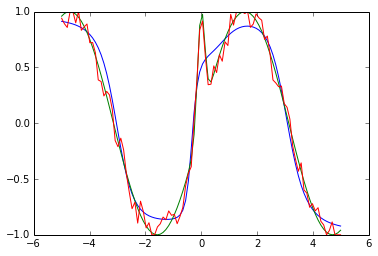

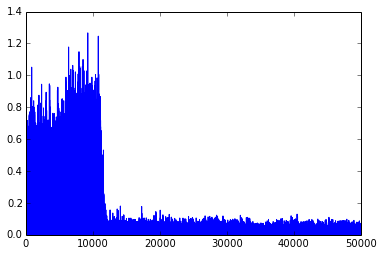

In [3]:
nn = [FullyConnectedLayer(1,15), Tanh(), 
      FullyConnectedLayer(15,5), Tanh(),
      FullyConnectedLayer(5,1), Tanh()]
criterion = MSE()

lr = 0.04
errors = []
for t in xrange(50000):
    i = np.random.randint(x1.shape[0])
    input, target = x1[i],y[i]
    for layer in nn:
        input = layer.forward(input)

    err = criterion.forward(input,target)
    errors.append(err)
    dOutput = criterion.backward(input,target)
    for layer in nn[::-1]:
        dOutput = layer.backward(dOutput,lr)
     
    if t % 3000 == 0:
        fitted = []
        for i in xrange(x1.shape[0]):
                input = x1[i]
                for layer in nn:
                    input = layer.forward(input)
                fitted.append(input)
        fitted = np.array(fitted).squeeze()
        plt.plot(x1,fitted,x1,y_true,x1,y)
        plt.show()
        
    #learning rate annealing
    if t % 1000 ==0:
        lr /= 1.01
    
errors = np.array(errors).squeeze()
plt.plot(errors)
plt.show()

